In [4]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import linear_model, datasets

# グラフをブラウザ内に表示させる（jupyterの設定）
%matplotlib inline

In [7]:
# ボストンの住宅価格のサンプルデータをロード
boston = datasets.load_boston()

In [8]:
# データフレーム化
dframe = DataFrame(boston.data)

In [12]:
# カラム情報をデータフレームへ当て込む
dframe.columns = boston.feature_names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
# ボストンデータの先頭を表示してみる
dframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
# 部屋数を説明変数として取り出す
rooms_training = DataFrame(dframe['RM'])

In [19]:
# 住宅価格を目的変数として取り出す
prices_training = DataFrame(boston.target)

In [22]:
# 回帰分析用のモデルデータの作成・トレーニング
model = linear_model.LinearRegression()
model.fit(rooms_training, prices_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# 予測用の部屋数データの作成と予測の実行
rooms_test = np.arange(rooms_training.min(), rooms_training.max(), 0.01)[:,np.newaxis]
prices_test = model.predict(rooms_test)

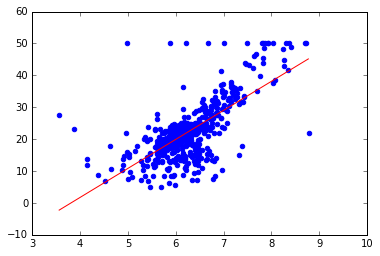

In [25]:
# 部屋数と価格のプロットと回帰直線の表示
plt.scatter(rooms_training, prices_training, color='blue')
plt.plot(rooms_test, prices_test, color='red')